In [425]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import cluster

In [402]:
# Зчитування даних
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

In [403]:
trainData.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
121,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S


In [404]:
testData.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
154,1046,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,NaN,S
215,1107,1,"Head, Mr. Christopher",male,42.0,0,0,113038,42.5000,B11,S
20,912,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C
131,1023,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C
159,1051,3,"Peacock, Mrs. Benjamin (Edith Nile)",female,26.0,0,2,SOTON/O.Q. 3101315,13.7750,NaN,S
308,1200,1,"Hays, Mr. Charles Melville",male,55.0,1,1,12749,93.5000,B69,S
386,1278,3,"Aronsson, Mr. Ernst Axel Algot",male,24.0,0,0,349911,7.7750,NaN,S
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
17,909,3,"Assaf, Mr. Gerios",male,21.0,0,0,2692,7.2250,NaN,C
283,1175,3,"Touma, Miss. Maria Youssef",female,9.0,1,1,2650,15.2458,NaN,C


In [405]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [406]:
print(trainData.shape)

(891, 12)


In [407]:
# визнаичмо категоріальні і чисельні типи даних
categoricalFeatures = ["Survived", "Pclass", "Name", "Sex", "Cabin", "Embarked"]

for feature in categoricalFeatures:
    trainData[feature] = trainData[feature].astype("category")
    
print(categoricalFeatures)

['Survived', 'Pclass', 'Name', 'Sex', 'Cabin', 'Embarked']


In [408]:
numericalFeatures = ["PassengerId", "Age", "SibSp", "Parch","Ticket", "Fare"]
print(numericalFeatures)

['PassengerId', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare']


In [409]:
# визначимо кількість нульових значень по клонкам та чи є в них повтори
trainData.isnull().sum() / trainData.shape[0] * 100 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [410]:
trainData.duplicated().sum()

0

In [411]:
trainData.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.0,891.0,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2.0,3.0,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,0.0,3.0,"Abbing, Mr. Anthony",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,549.0,491.0,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [412]:
# можемо обрати колонки для видалення, яки можна вважати наймеш цінними або неповними
toDelete = ["Cabin", "Name", "Ticket"]
trainData.drop(toDelete, axis = 1, inplace = True)

categoricalFeatures.remove("Name")
categoricalFeatures.remove("Cabin")
numericalFeatures.remove("Ticket")

In [413]:
# вирішимо проблему з missing data
trainData.dropna(subset=["Embarked"], inplace = True)
trainData['Age'].fillna(trainData['Age'].mean(), inplace=True)



In [414]:
trainData.isnull().sum() / trainData.shape[0] * 100 

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

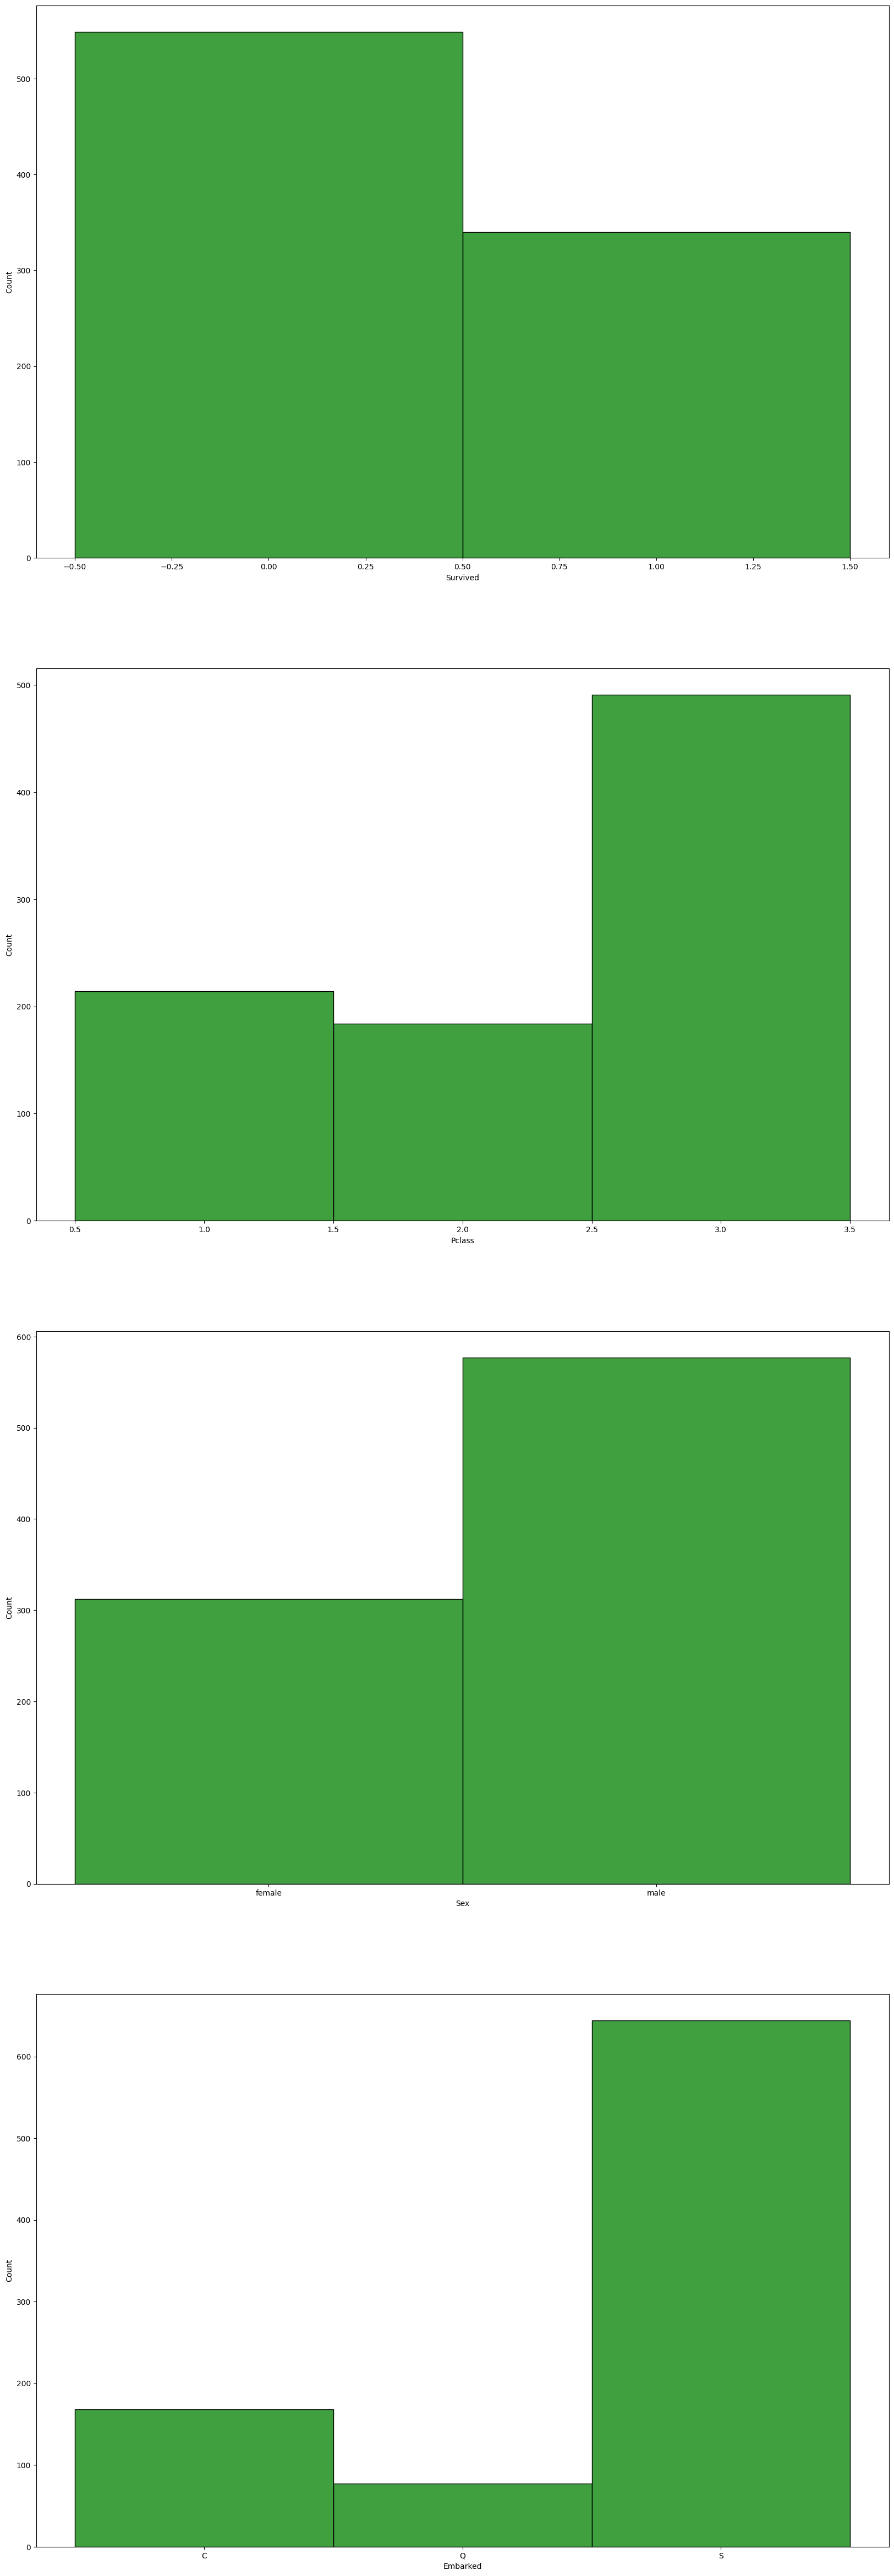

In [415]:
# подивимось розподіли категоріальних даних 
palette = ["green"]
sns.set_palette(palette=palette)
fig, axes = plt.subplots(nrows=len(categoricalFeatures), ncols=1)
fig.set_size_inches(20, 60)
for i, col in enumerate(categoricalFeatures):
    sns.histplot(trainData[col], kde=False, ax=axes[i], color='C1')
plt.show()

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

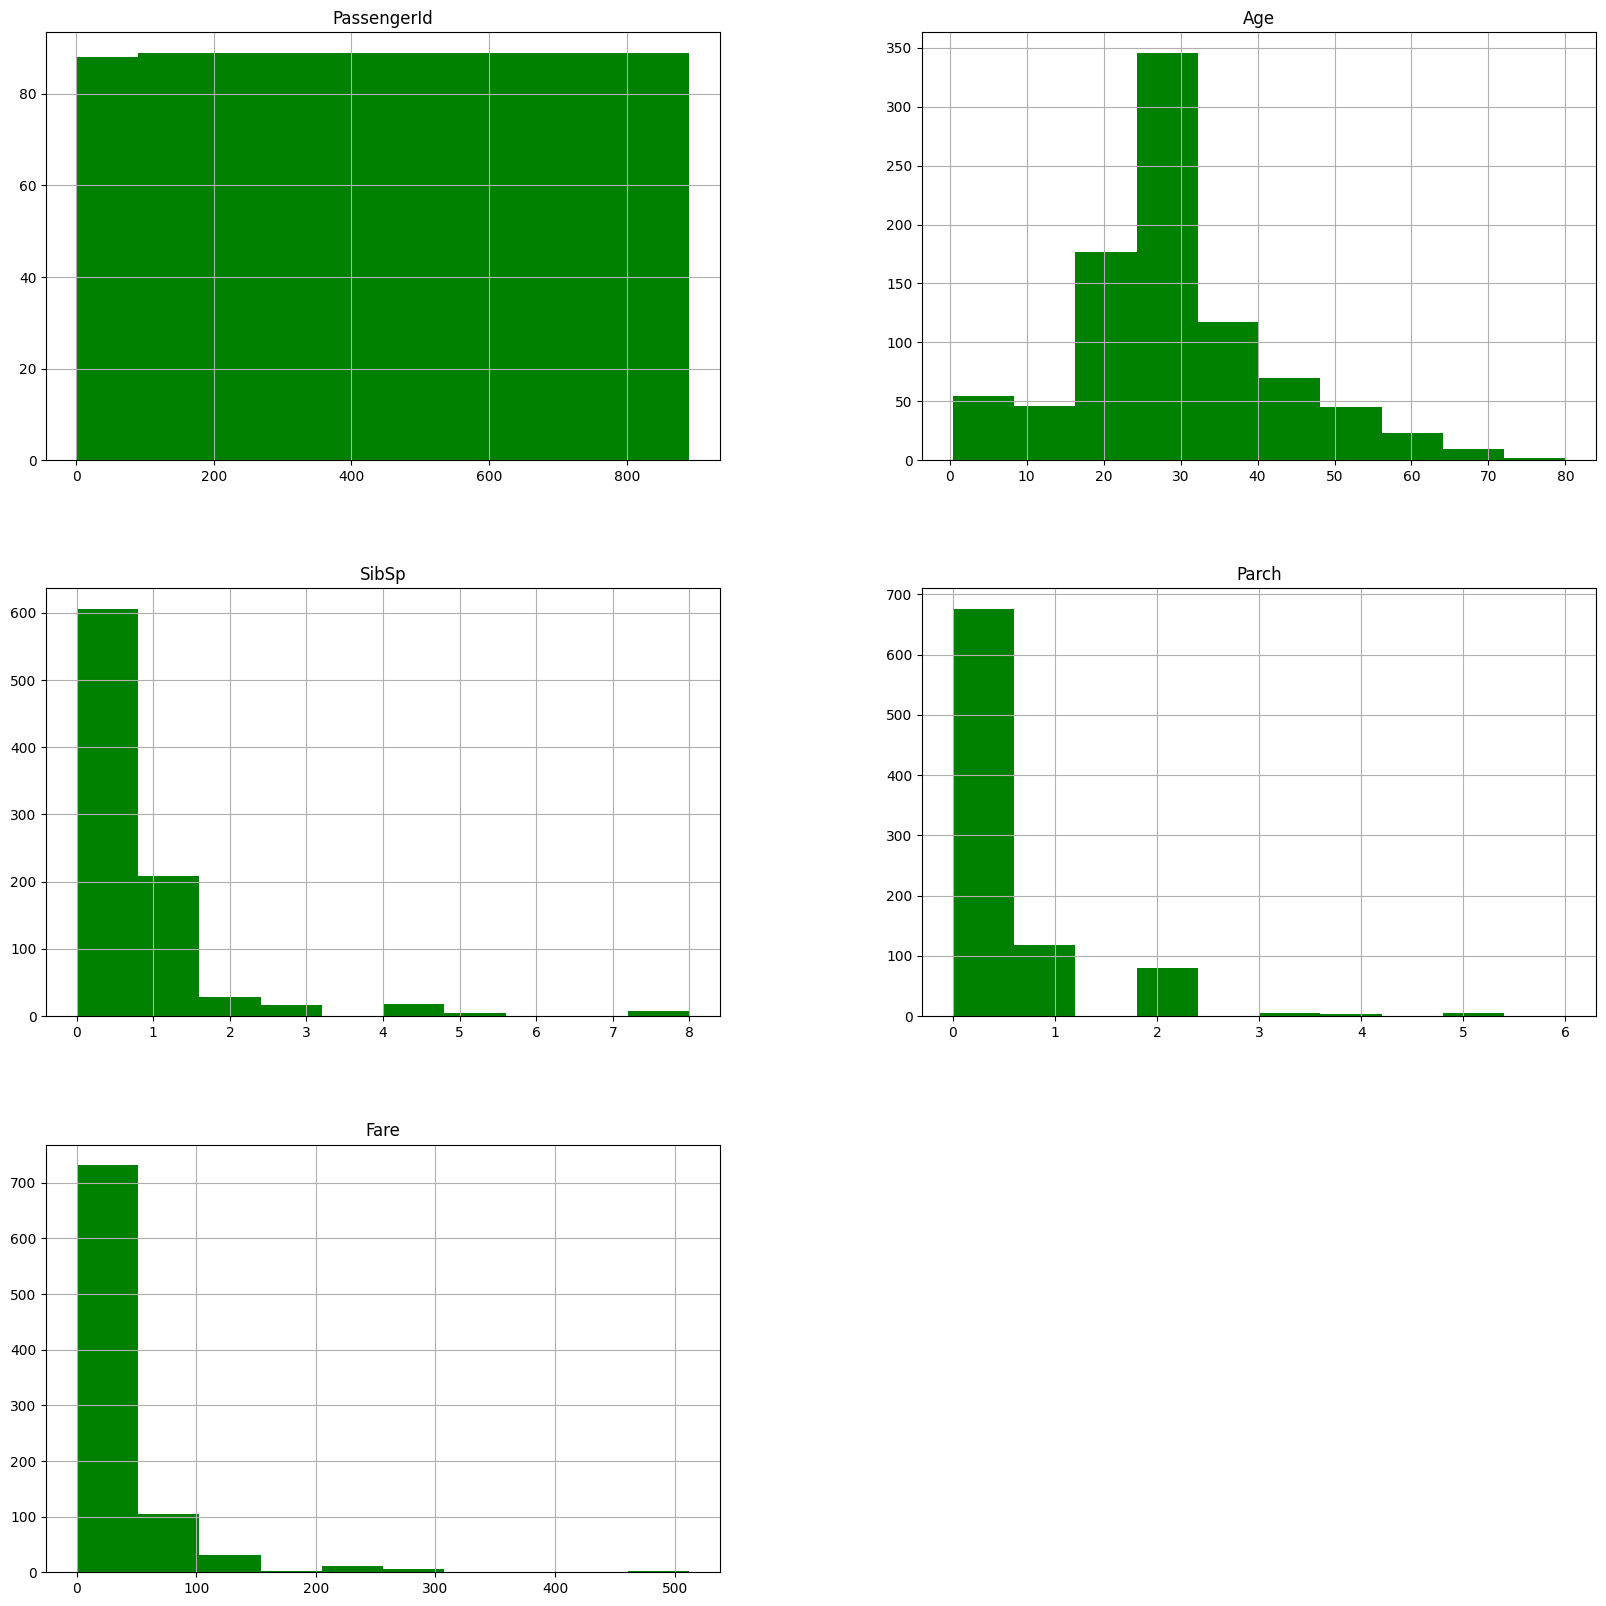

In [416]:
# подивимось розподіли чисельних даних 
trainData[numericalFeatures].hist(figsize=(20,20), color="green")

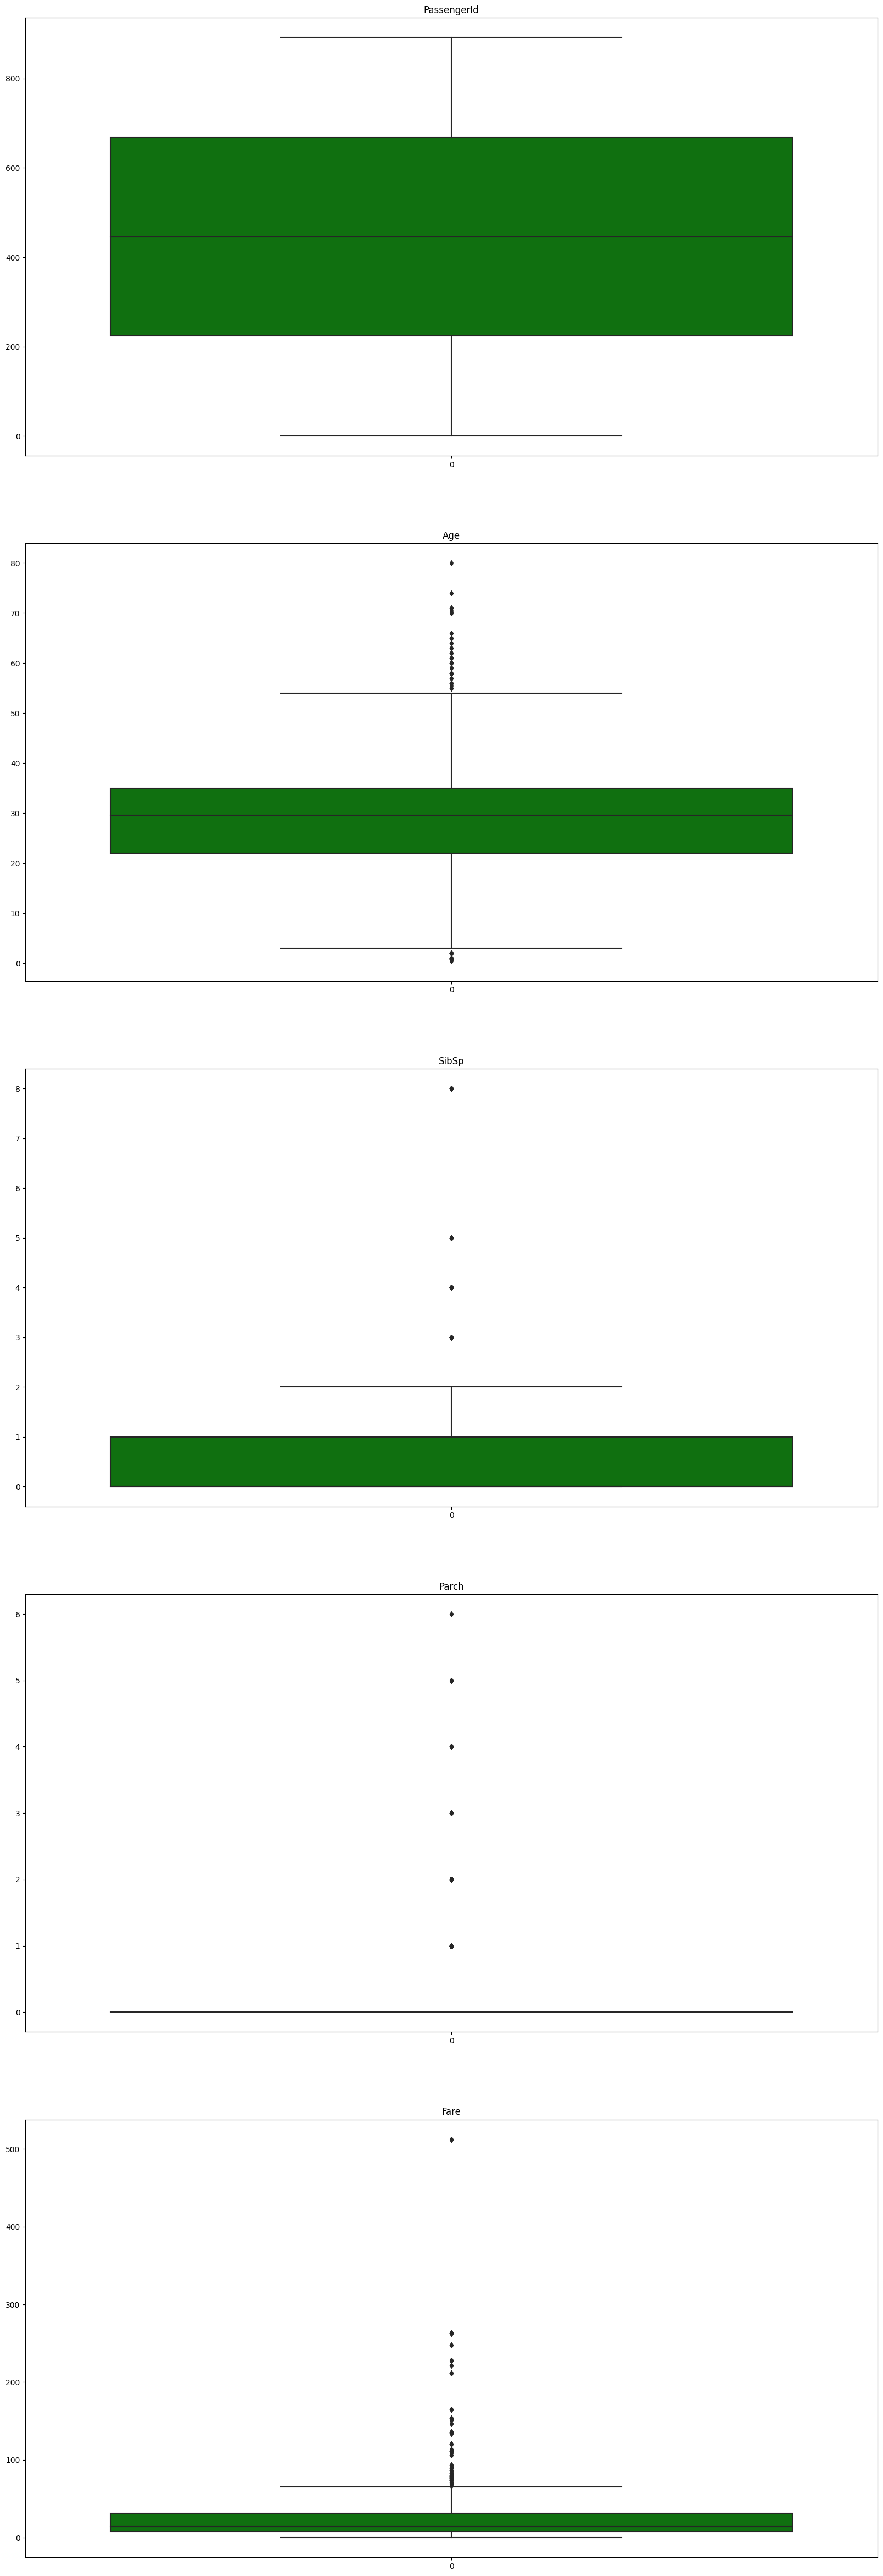

In [417]:
#подивимось чи є аутлайери в числових фічах
fig, axes = plt.subplots(nrows=len(numericalFeatures), ncols=1)
fig.set_size_inches(20, 60)
for i, col in enumerate(numericalFeatures):
    ax = sns.boxplot(data=trainData[col], ax=axes[i], color="green")
    ax.set_title(col)
plt.show()

C:\Users\thesk\AppData\Local\Temp\ipykernel_19012\4127129119.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = trainData.corr()


<Axes: >

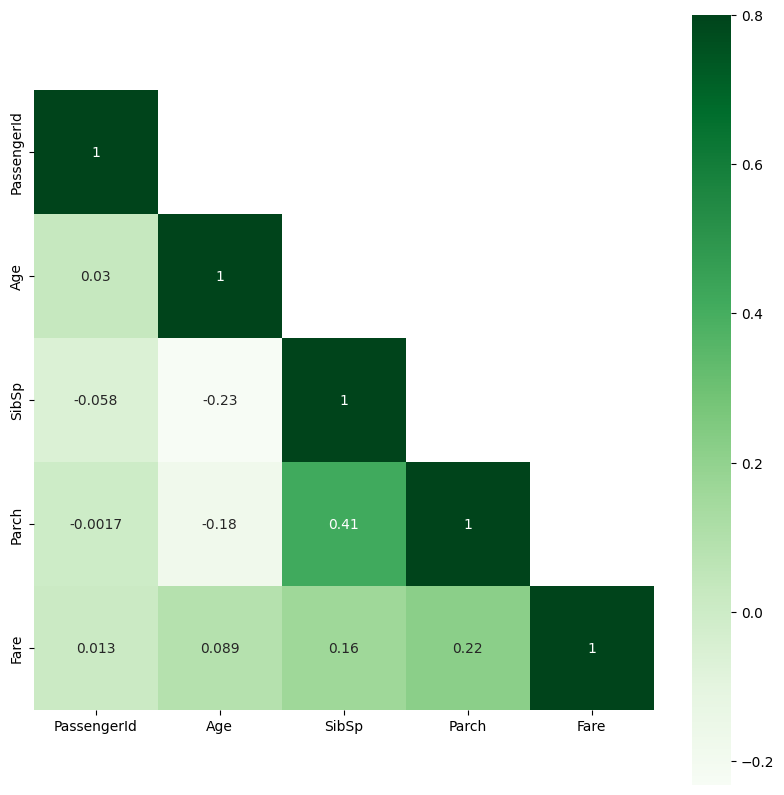

In [418]:
#переглянемо як які фічі корелюються вигляді матриці
correlationMatrix = trainData.corr()
mask = np.array(correlationMatrix)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(correlationMatrix, cmap="Greens", mask=mask, vmax=0.8, square=True, annot=True)

In [432]:
#класифікуємо
transformer = ColumnTransformer(transformers = [
        ("nominal_feats", OneHotEncoder(),pd.Index(categoricalFeatures)),
        ('numerical', RobustScaler(),pd.Index(numericalFeatures))
])

fitTrainDataset = pd.DataFrame(transformer.fit_transform(trainData))

In [434]:
# виконаємо кластеризацію трьома різинми методами з оптимальними параметрами
clustering = []
clusteringName = []
clusteringName.append("KMeans")
clustering.append(cluster.KMeans(n_clusters=2).fit(fitTrainDataset).labels_)
clusteringName.append("AgglomerativeClustering")
clustering.append(cluster.AgglomerativeClustering().fit(fitTrainDataset).labels_)
clusteringName.append("DBSCAN")
clustering.append(cluster.DBSCAN(eps=4, min_samples=2).fit(fitTrainDataset).labels_)

D:\Soft\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


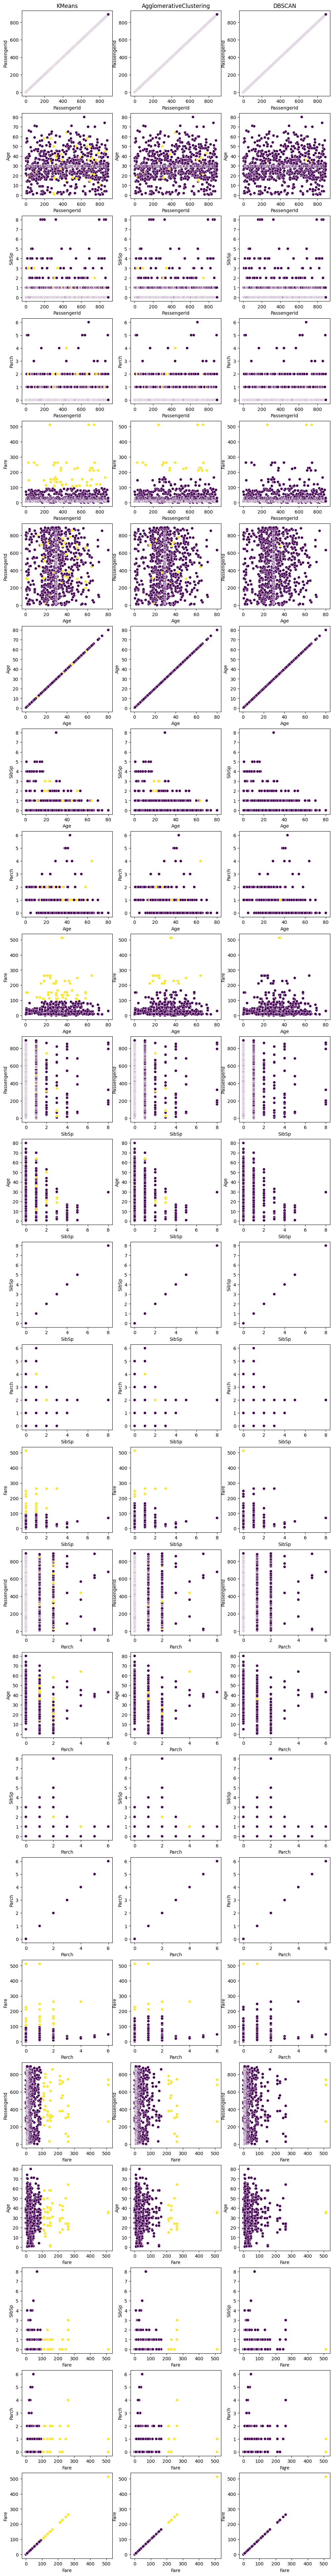

In [435]:
# візуалізуємо отримані данні
fig, axs = plt.subplots(len(numericalFeatures)**2, len(clustering), squeeze=False)
fig.set_size_inches(len(clustering)*4,len(numericalFeatures)**2*4)

for ax, col in zip(axs[0], clusteringName):
    ax.set_title(col)

for i, pair in enumerate(list(itertools.product(numericalFeatures, numericalFeatures))):
    for j, result in enumerate(clustering):
        plt.title(j, size=9);
        sns.scatterplot(
            x=trainData[pair[0]], 
            y=trainData[pair[1]], 
            c=result,
            ax=axs[i,j])
plt.show()